
# Project: Analysis - TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project aims to analyse the TMDB Movie dataset that contains information on over 10,000 movies such as release date, genres, revenues etc. 

### Question(s) for Analysis

The following questions can be tentatively answered from the dataset:

1.	What are the top ten most profitable movies? 
2.  Is a certain genre associated with higher profits?
3.  Do movies with higher popularity ratings receive higher profits?

Let's begin my importing all the packages we expect to use throughout this project.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

We will use the next few cells to load and assess the data.


In [107]:
# loading the data and printing the first five rows
df = pd.read_csv('tmdb_movies.csv')
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

> ***NOTE*** <br>
>   -  *The following columns (and possibly others) contain delimiters ' | ': cast, genres, production_companies* <br>

Let's view a concise summary of the data set.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> ***NOTE*** <br>
>   -  *The dataset has 10866 columns and 21 rows.* <br>
>   -  *The number of non-null values per column indicate that there are some columns that contain missing values.* <br>
 
Let's get a better understanding of the missing values.

In [109]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's check for any dupilcates.

In [110]:
df.duplicated().sum()

1

In [111]:
#viewing duplicate rows

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Since we will be working with budget_adj and revenue_adj to calculate profits,<br> let's see if there are any rows where *budget_adj* or *revenue_adj* contain zeros or negative values.

In [112]:
zeros_budget = df[(df['budget_adj']<=0)]
zeros_revenue = df[(df['revenue_adj']<=0)]

print(zeros_budget.shape[0])
print(zeros_revenue.shape[0])

5696
6016



### Data Cleaning

 

After exploring and assessing the dataset, we see that the following needs to be done as part of the data cleaning process.

 -  Drop extraneous columns (including budget and revenue columns since the budget_adj and revenue_adj report on that information while accounting for inflation) source: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/discussion/45990?search=revenue) 
 -  Drop rows with missing values
 -  Dedupe data
 -  Remove rows that contain zeroes in the following columns: *budget_adj, revenue_adj*
 -  Create a column to return profit

Let's remind ourselves of the current number of columns and rows.

In [113]:
print(df.shape)

(10866, 21)


**Dropping extraneous columns**

In [114]:
df.drop(['imdb_id','budget','production_companies','runtime','revenue','release_date','keywords','director','cast','homepage','vote_count','vote_average','tagline','overview'],axis=1, inplace=True)

#confirming the columns are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
genres            10843 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 594.4+ KB


**Dropping rows with missing values**

In [115]:
df.dropna(inplace=True)

In [116]:
#we check to see if any of our columns still have null values
df.isnull().sum().any()

False

**Removing duplicates**

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
#we confirm that there are no more duplicates in our dataset
df.duplicated().sum()

0

Let's get an update on our dataset.

In [119]:
df.shape

(10842, 7)

**Removing rows that contain zeros in budget_adj or revenue_adj**

In [120]:
#return the number of rows in this updated dataset that contain zeros in the budget_adj
budg_0 = df[(df['budget_adj']<=0)]

print(budg_0.shape[0])

5674


In [121]:
#dropping rows that contain zeroes in the budget_adj column 
df.drop(budg_0.index,inplace=True)

In [122]:
#return the number of rows in this updated dataset that contain zeros in the revenue_adj
rev_0 = df[(df['revenue_adj']<=0)]

print(rev_0.shape[0])

1314


In [123]:
#dropping rows that contain zeroes in the budget_adj column 
df.drop(rev_0.index,inplace=True)

In [124]:
#confirming that the rows are removed
budg_0 = df[(df['budget_adj']<=0)]
rev_0 = df[(df['revenue_adj']<=0)]

print(budg_0.shape[0])
print(rev_0.shape[0])

0
0


Let's get an update on our dataset.

In [125]:
df.shape

(3854, 7)

**Creating a column to hold profit** <br>

In [126]:
# creating a column to hold profits
df['profit'] = df['revenue_adj'] - df['budget_adj']

#confirming column is added
df.sample(1)


,id,popularity,original_title,genres,release_year,budget_adj,revenue_adj,profit
3532,56288,0.688697,Spy Kids: All the Time in the World,Family|Comedy|Action,2011,2.617375e+07,8.294587e+07,5.677213e+07


Although not necessary, we will reoder the columns such that original_title is shown after id.

In [127]:
df = df.reindex(columns=['id', 'original_title','genres','popularity','release_year','budget_adj','revenue_adj','profit'])

Let's get an update on our dataset.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
id                3854 non-null int64
original_title    3854 non-null object
genres            3854 non-null object
popularity        3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
profit            3854 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 271.0+ KB


Now that we have a clean dataset, we can move on to exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What are top ten movies with the highest profits?

In [129]:
# viewing a summary of the statistics
df.describe()

,id,popularity,release_year,budget_adj,revenue_adj,profit
count,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,67222.527399,1.475162,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,5.000000,0.001117,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,6073.500000,0.462368,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,11321.500000,0.797511,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,38573.250000,1.368324,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,417859.000000,32.985763,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


>  __NOTE__ <br>
>   Our dataset contains movies released over 55 years. <br>
>   25% of these movies made a loss.<br>
>   50% of movies made a profit lower than the total average profit.

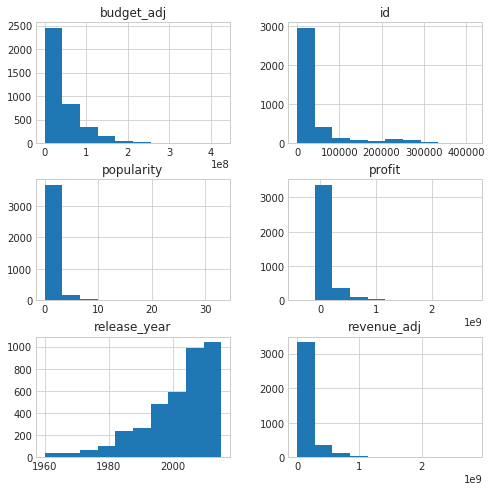

In [130]:
#histogram for various features to further examine the distributions
df.hist(figsize=(8,8));

>  __NOTE__ <br>
>   - The release_year is the only feature variable that does not appear to be positively skewed. <br>
>   - The distrubution of profit suggests that many of the values are close to the lower bound and the number of higher profits are few. The average profit of 9.282470e+07(as seen in summary) is influenced by the value of the maximum profit.

In [131]:
# return the top ten movies with the highest profits
df_top10 = df.nlargest(10,'profit')
df_top10

,id,original_title,genres,popularity,release_year,budget_adj,revenue_adj,profit
1329,11,Star Wars,Adventure|Action|Science Fiction,12.037933,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,Avatar,Action|Adventure|Fantasy|Science Fiction,9.432768,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,Titanic,Drama|Romance|Thriller,4.355219,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,The Exorcist,Drama|Horror|Thriller,2.010733,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,Jaws,Horror|Thriller|Adventure,2.563191,1975,2.836275e+07,1.907006e+09,1.878643e+09
8889,601,E.T. the Extra-Terrestrial,Science Fiction|Adventure|Family|Fantasy,2.900556,1982,2.372625e+07,1.791694e+09,1.767968e+09
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104,2015,1.839999e+08,1.902723e+09,1.718723e+09
8094,1642,The Net,Crime|Drama|Mystery|Thriller|Action,1.136610,1995,3.148127e+07,1.583050e+09,1.551568e+09
10110,12230,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,2.631987,1961,2.917944e+07,1.574815e+09,1.545635e+09
7309,1891,The Empire Strikes Back,Adventure|Action|Science Fiction,5.488441,1980,4.762866e+07,1.424626e+09,1.376998e+09


>  __NOTE__ <br>
>   - Each of the top 10 movies has a profit that is greater than the mean, and greater than 75% of the profits returned (comparing to statitics summary).

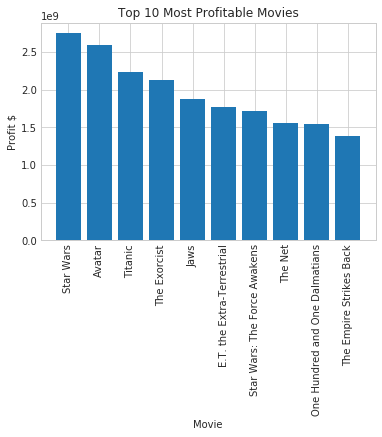

In [132]:
#displaying top 10 profitable movies on a bar chart
locations = [1,2,3,4,5,6,7,8,9,10]
heights = [2750136650.919176, 2586236847.524277,2234713671.205051,2128035624.5693455,1878643093.7113247,1767968064.0219922,1718723210.761785,
 1551568265.2760665,1545635294.8728774,1376997526.2202368]
labels = ['Star Wars', 'Avatar', 'Titanic','The Exorcist', 'Jaws', 'E.T. the Extra-Terrestrial', 'Star Wars: The Force Awakens',
 'The Net',
 'One Hundred and One Dalmatians',
 'The Empire Strikes Back']
plt.bar(locations,heights,tick_label=labels)
plt.title('Top 10 Most Profitable Movies')
plt.xticks(rotation='vertical')
plt.xlabel('Movie')
plt.ylabel('Profit $');

>  __NOTE__ <br>
>   - This bar chart helps us to better visualize the difference in the profits of the top ten movies and compare the profits. We can see the significant differences in profits between the most profitable movie and the 10th most profitable movie. 
>   - The most profitable movie, *Star Wars*, has almost twice the profits as the tenth most profitable movie, *The Empire Strikes Back*.
>   - Interestingly, research shows that *The Empire Strikes Back* is actually a sequel of the top profitable movie, *Star Wars*.
https://starwars.fandom.com/wiki/Star_Wars:_Episode_V_The_Empire_Strikes_Back

### Research Question 2  - Is a certain genre associated with higher profits?

We recall that the genres column contains values separated by delimiters.

In [133]:
# Upgrade pandas to use dataframe.explode() function.
# restart kernel after install is complete and run all rows

!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [134]:
# we split the genres by the delimiter
df['genres'] = df['genres'].str.split("|")

In [135]:
# use df.explode() to transform each genre into separate rows
df_genres = df.explode('genres')

In [136]:
# finding the mean profit of each genre category
profit_genres = df_genres.groupby('genres').mean().profit.sort_values(ascending=False)

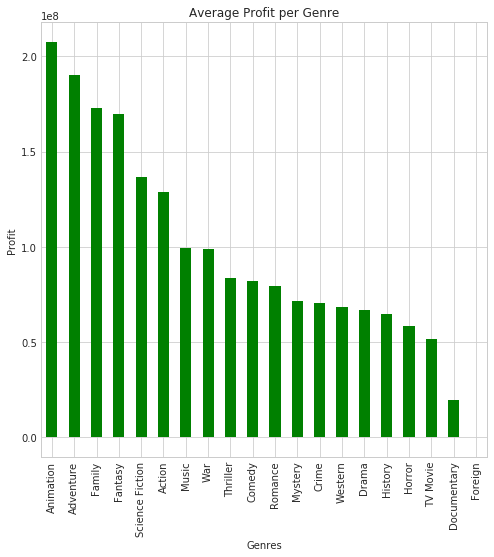

In [137]:
#representing the average profit per genre on a bar chart
profit_genres.plot(kind='bar',figsize=(8,8),color='green')
plt.title('Average Profit per Genre')
plt.xlabel('Genres')
plt.ylabel('Profit');

>  __NOTE__ <br>
>   - This bar chart helps us to better visualize the difference in the average profits per genre and compare these profits. The top four genres *(Animation, Adventure, Family, and Fantasy)* are significantly more profitable than the other genres.

Let's observe the trend in average profit for each of the top four movie genres over the years.

In [138]:
# define a function to return the average profit per year for a given genre
def specific_genre(x):
    df_genrex = df_genres[df_genres['genres'].str.contains(x)] #return the rowns with specific genre
    avg_genre = df_genrex.groupby('release_year').profit.mean() #find the average profit per year 
    return avg_genre

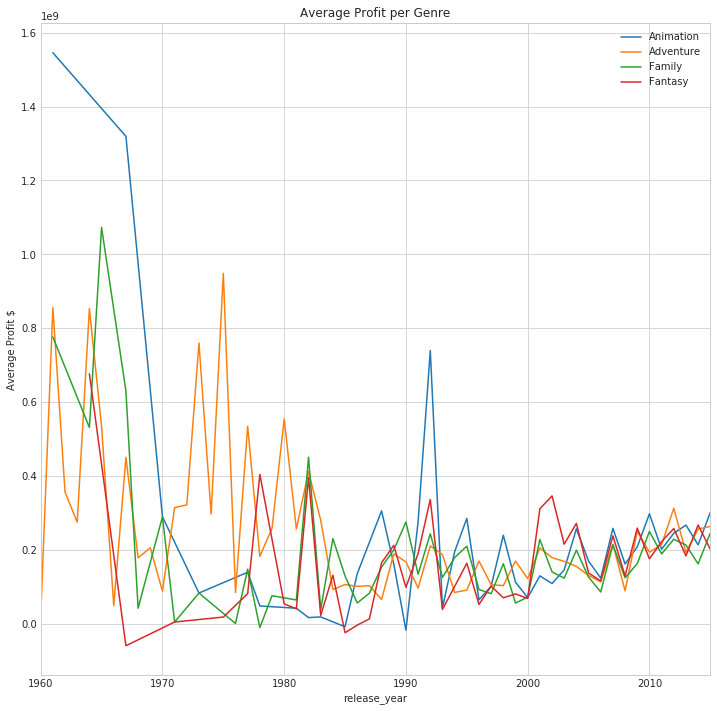

In [139]:
# plot line graphs of year vs average profit for top 5 genres
dfgenre1 = specific_genre('Animation').plot(figsize=(12,12))
dfgenre2 = specific_genre('Adventure').plot()
dfgenre3 = specific_genre('Family').plot()
dfgenre4 = specific_genre('Fantasy').plot()

plt.title('Average Profit per Genre')
plt.ylabel('Average Profit $');
plt.legend(['Animation','Adventure','Family','Fantasy']);

>  __NOTE__ <br>
>   - This line chart helps us to better visualize change in average profits per genre over the 55 years. <br>
>   - The *Fantasy* genre appears to have been non-profitable on average for movies released in the late 1960s and for movies released in the 1980s but remained profitable on average for movies released since the late 1980s. <br>
>   - The *Family* genre was only non-profitable on average for movies released in the 1970s but has remained profitable on average for movies released since the late 1970s.
>   - Similar to the *Family* genre, the *Animation* genre was only non-profitable on average for movies released in the late 1980s but has remained profitable on average for movies released since the 1990s.
>   - The *Advennure* genre however, has only ever been profitable on average.

### Research Question 3  - Do movies with higher popularity ratings receive higher profits?

In [140]:
#return the median popularity rating
median_popularity = df.popularity.median()
median_popularity

0.7975105

In [141]:
#grouping movies into two categories
low_rating = df.query('popularity < {}'.format(median_popularity))
high_rating = df.query('popularity > {}'.format(median_popularity))

In [142]:
#ensuring that each sample is included exactly once
num_samples = df.shape[0]
num_samples == low_rating['profit'].count() + high_rating['profit'].count()

True

In [143]:
#return mean profit for each group
low_rating.profit.mean(), high_rating.profit.mean()

(26210728.062026724, 159438666.38416967)

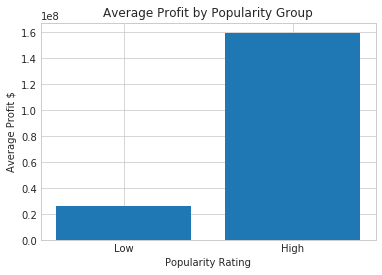

In [144]:
#displaying means on a bar chart to better guage the diffence in mean per group
locations = [1,2]
heights = [low_rating.profit.mean(),high_rating.profit.mean()]
labels = ['Low','High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Profit by Popularity Group')
plt.xlabel('Popularity Rating')
plt.ylabel('Average Profit $');

>  __NOTE__ <br>
>   - We clearly see that the average profit for movies with higher popularity ratings is over five times more than the average profit for movies with lower popularity ratings.

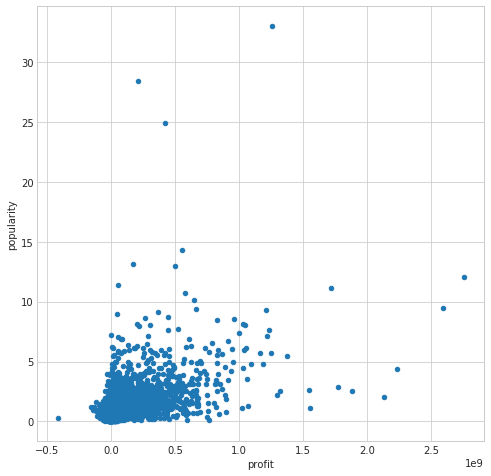

In [145]:
# observing the correlation between popularity and profitability
df.plot(x='profit',y='popularity',kind='scatter',figsize=(8,8));

>  __NOTE__ <br>
>   - There appears to be a positive correlation between popularity and profits.
>   - This suggests that popularity has a positive impact on profits.

<a id='conclusions'></a>
## Conclusions
>  The following conclusions are based on the clean dataset. 


>   -  The top ten most profitable movies (in descending order) are: 
        1.  *Star Wars*
        2.  *Avatar*
        3.  *Titanic*
        4.  *The Exorcist*
        5.  *Jaws*
        6.  *E.T. the Extra-Terrestrial*
        7.  *Star Wars: The Force Awakens*
        8.  *The Net*
        9.  *One Hundred and One Dalmatians*
        10. *The Empire Strikes Back*  
>   -  The top 10 most profitable movies rank in the top 25 percentile.
>   -  The animation genre is associated with the highest average profit.<br>
>   -  The following genres have remianed profitable (on average) for those movies released between 2000 and 2015: <br>Animation, Adventure, Family, Fantasy
>   -  Movies with higher popularity ratings return higher profits.<br>
>   -  Popularity has a strong, positive impact on a movie's profitability.<br>

>  Further analysis shoud be done into movies that were profitable to identify characteristics that can predict profitabilty.
### Limitations

>   -  More than half of the data was removed to meet the criteria of budget_adj or revenue_adj being >= 0. Had the accurate data been provided for all rows in both columns, there might have been different movies in the top 10 as well as changes to all results/observations.

